In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [2]:
def exp_taylor_series(X: float, N: int, A: float) -> float:
    n = np.array(range(N+1))
    a = (X - A)**n

    factorials = []
    for number in n:
        factorials.append(math.factorial(number))
    factorials_array = np.array(factorials)

    a = a / factorials_array

    deriv = np.empty(N+1)
    deriv.fill(np.exp(A))
    return np.dot(a, deriv)

In [3]:
def cos_taylor_series(X: float, N: int, A: float) -> float:
    result = 0
    for n in range(N + 1):
        if n % 4 == 0:
            result += (math.cos(A) * (X - A)**n) / math.factorial(n)
        elif n % 4 == 1:
            result -= (math.sin(A) * (X - A)**n) / math.factorial(n)
        elif n % 4 == 2:
            result -= (math.cos(A) * (X - A)**n) / math.factorial(n)
        elif n % 4 == 3:
            result += (math.sin(A) * (X - A)**n) / math.factorial(n)
    return result

def sin_taylor_series(X: float, N: int, A: float) -> float:
    result = 0
    for n in range(N + 1):
        if n % 4 == 0:
            result += (math.sin(A) * (X - A)**n) / math.factorial(n)
        elif n % 4 == 1:
            result += (math.cos(A) * (X - A)**n) / math.factorial(n)
        elif n % 4 == 2:
            result -= (math.sin(A) * (X - A)**n) / math.factorial(n)
        elif n % 4 == 3:
            result -= (math.cos(A) * (X - A)**n) / math.factorial(n)
    return result

In [4]:
class taylor_series:
    def __init__(self) -> None:
        self.graph_params = {}
        self.params = {}
        self.xs = None
        
    def set_params(self, N = 5, A = 0):
        self.params["N"] = N
        self.params["A"] = A
        return
    
    def set_graph_params(self, size = 5000, lower_bound = -10, upper_bound = 10):
        self.graph_params = {
            "size": size,
            "lower_bound": lower_bound,
            "upper_bound": upper_bound
        }
    
    def plot_function(self, func="exponential"):
        assert func in ["exponential", "cosine", "sine"]
        
        if func == "exponential":
            taylor=exp_taylor_series
            function = np.exp
        elif func == "cosine":
            taylor = cos_taylor_series
            function = np.cos
        elif func == "sine":
            taylor = sin_taylor_series
            function = np.sin
            
        if not self.graph_params:
            self.set_graph_params()
        
        size = self.graph_params["size"]
        lower_bound = self.graph_params["lower_bound"]
        upper_bound = self.graph_params["upper_bound"]
        
        if self.xs is None:
            self.xs = np.sort(np.random.uniform(low=lower_bound, high=upper_bound, size=size))
            
        y = function(self.xs)
        
        taylor_ys = [taylor(x, **self.params) for x in self.xs]
        
        plt.figure(figsize=(10, 6))
        plt.plot(self.xs, y, label='Function', marker='o')
        plt.plot(self.xs, taylor_ys, label='Taylor Approximation', marker='o', color='red')
        plt.title("Plot of the Function and its Taylor Series Approximation")
        plt.xlim(lower_bound *1.1, upper_bound *  1.1)
        plt.ylim(np.min(y) - abs(0.1 *np.max(y)), np.max(y) * 1.1)
        plt.text(x = lower_bound, y = np.max(y)*2/3, s = f"Order = {self.params['N']}")
        plt.text(x = lower_bound, y = np.max(y)*3/4, s = f"Function = {func}")
        plt.legend()
        plt.show()
        
    def visualize_plots(self, N=10, A = 0, func = "exponential"):
        for i in range(N+1):
            self.set_params(N=i, A = A)
            self.plot_function(func = func)
            display(plt.gcf())
            plt.close()
            time.sleep(0.5)
            clear_output(wait=True) 


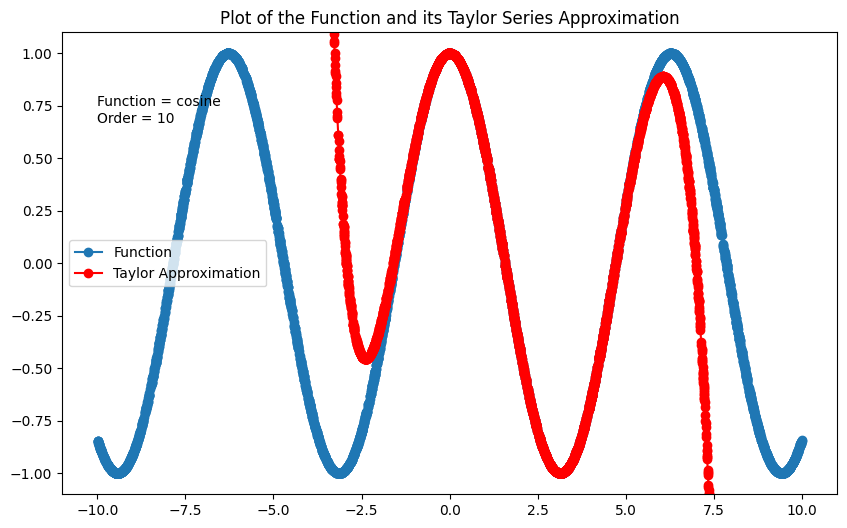

<Figure size 640x480 with 0 Axes>

In [5]:
TaylorSeries = taylor_series()
TaylorSeries.visualize_plots(N = 10, A = 2, func = "cosine")

## Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
def create_polynomials(xs, N = 10):
    xs = xs.reshape(len(xs), 1)
    xs_copy = xs.copy()
    for n in range(2, N + 1):
        xs = np.concatenate([xs, xs_copy**n], axis = 1)
    return xs

In [8]:
def crazy_func(xs):
    return np.sqrt(np.exp(xs/10) * np.cos(xs) + 4)

In [9]:
class linear_approx:
    def __init__(self) -> None:
        self.graph_params = {}
        self.params = {}
        self.xs = None
        
    def set_graph_params(self, size = 100000, lower_bound = -10, upper_bound = 10):
        self.graph_params = {
            "size": size,
            "lower_bound": lower_bound,
            "upper_bound": upper_bound
        }
    
    def plot_function(self, N =5, func="exponential"):    
        if func == "exponential":
            function = np.exp
        elif func == "cosine":
            function = np.cos
        elif func == "sine":
            function = np.sin
        else:
            function = func
            
        if not self.graph_params:
            self.set_graph_params()
        
        size = self.graph_params["size"]
        lower_bound = self.graph_params["lower_bound"]
        upper_bound = self.graph_params["upper_bound"]
        
        if self.xs is None:
            self.xs = np.sort(np.random.uniform(low=lower_bound, high=upper_bound, size=size))
            
        y = function(self.xs)
        
        poly_xs= create_polynomials(self.xs, N= N)
        
        model = LinearRegression()
        model.fit(poly_xs, y)
        predictions = model.predict(poly_xs)
        
        
        plt.figure(figsize=(10, 6))
        plt.plot(self.xs, y, label='Function', marker='o')
        plt.plot(self.xs, predictions, label='Taylor Approximation', marker='o', color='red')
        plt.title("Plot of the Function and its Taylor Series Approximation")
        plt.xlim(lower_bound *1.1, upper_bound *  1.1)
        plt.ylim(np.min(y) - abs(0.1 *np.max(y)), np.max(y) * 1.1)
        plt.text(x = lower_bound, y = np.min(y)+0.2*(np.max(y)-np.min(y)), s = f"Order = {N}")
        if function is str:
            plt.text(x = lower_bound, y = np.min(y), s = f"Function = {func}")
        else:
            plt.text(x = lower_bound, y = np.min(y), s = f"Function = Custom Function")
        plt.legend()
        plt.show()
        
    def visualize_plots(self, N=10, A = 0, func = "exponential"):
        for i in range(N+1):
            self.plot_function(func = func, N = i)
            display(plt.gcf())
            plt.close()
            time.sleep(0.5)
            clear_output(wait=True) 


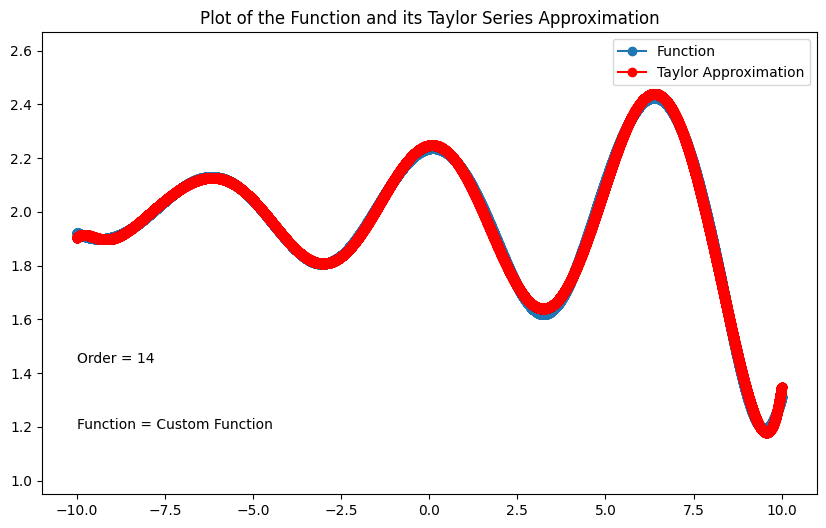

<Figure size 640x480 with 0 Axes>

In [10]:
LinearApprox = linear_approx()
LinearApprox.visualize_plots(N= 14, func = crazy_func)

## Neural Network

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
def relu(x):
    return np.maximum(0, x)

def cost(ypred, y):
    m = len(y)
    return(np.sum((ypred - y)**2) / y.shape[1])

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

In [18]:
def initialize_weights(layer_dims):
    params = {}
    params["layers"] = len(layer_dims) - 1
    for l in range(1,len(layer_dims)):
        params["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2 / layer_dims[l-1])
        params["b" + str(l)] = np.zeros((layer_dims[l],1))
    return params 

def forward_propagation(X, params):
    cache = {}
    
    layers = params["layers"]
    W1 = params["W1"]
    b1 = params["b1"]
    
    Zl = np.dot(W1, X.T) + b1
    Al = np.tanh(Zl)
    
    cache["Z1"] = Zl
    cache["A1"] = Al
    
    for l in range(2, layers+1):
        Wl = params["W" + str(l)]
        bl = params["b" + str(l)]
        
        Zl = np.dot(Wl, Al) + bl
        if l == layers:
            Al=Zl
        else:
            Al = relu(Zl)
        
        cache["Z" + str(l)] = Zl
        cache["A" + str(l)] = Al
        
    return Al, cache

def back_propagation(cache, params, y, xs):
    layers = params["layers"]
    grads = {}
    
    # Compute gradient for the output layer
    Al = cache["A" + str(layers)]
    dAl = -2 * (y - Al)  # Derivative of MSE loss

    dZl = dAl * relu_derivative(cache["Z" + str(layers)])  # Apply ReLU derivative
    
    # Gradients for the last layer weights and biases
    grads["dW" + str(layers)] = np.dot(dZl, cache["A" + str(layers-1)].T) / y.shape[0]
    grads["db" + str(layers)] = np.mean(dZl.T, axis=0)
    
    # Propagate the gradient through the network
    for l in range(layers - 1, 0, -1):
        dAl = np.dot(dZl.T, params["W" + str(l + 1)])
        dZl = dAl.T * relu_derivative(cache["Z" + str(l)])

        # Compute gradients for weights and biases
        grads["dW" + str(l)] = np.dot(dZl, cache["A" + str(l-1)].T if l > 1 else xs ) / y.shape[0]
        grads["db" + str(l)] = np.mean(dZl.T, axis=0)
        
    return grads

def teach_weights(lr, grads, params, beta=0.9):
    layers = params["layers"]
    for l in range(1, layers + 1):  # make sure to include the last layer
        # Initialize momentum for weights and biases if not already done
        if "Vdw" + str(l) not in params:
            params["Vdw" + str(l)] = np.zeros_like(params["W" + str(l)])
            params["Vdb" + str(l)] = np.zeros_like(params["b" + str(l)])
        
        # Update momentum
        params["Vdw" + str(l)] = beta * params["Vdw" + str(l)] + (1 - beta) * grads["dW" + str(l)]
        params["Vdb" + str(l)] = beta * params["Vdb" + str(l)] + (1 - beta) * grads["db" + str(l)].reshape(-1,1)
        
        # Update weights and biases
        params["W" + str(l)] -= lr * params["Vdw" + str(l)]
        params["b" + str(l)] -= lr * params["Vdb" + str(l)]
    
    return params


def FCNN(xs, y, layer_dims, initial_lr, epochs = 10, decay_rate=0.8, decay_steps=100):
    params = initialize_weights(layer_dims=layer_dims)
    for e in range(1, epochs+1):
        Al, cache = forward_propagation(xs, params = params)
        current_cost = cost(y, Al)
        if e%1000 == 0:
            print(f"Loss after Epoch {e}: {current_cost}")
        
        grads = back_propagation(cache, params, y, xs)
        lr = initial_lr * (decay_rate ** (e / decay_steps))
        params = teach_weights(lr = lr, grads = grads, params = params)
    
    return Al, params

In [19]:
xs = create_polynomials(TaylorSeries.xs, N= 5)
y = np.exp(TaylorSeries.xs)

In [20]:
scaler = StandardScaler()
xs = scaler.fit_transform(xs)

In [88]:
preds, params = FCNN(xs = xs, y = np.cos(TaylorSeries.xs), layer_dims = [5,10,10,1], initial_lr = 0.000001, epochs = 50000, decay_rate= 0.95, decay_steps=1000)

Loss after Epoch 1000: 3.0622951114644104
Loss after Epoch 2000: 2.917805976754888
Loss after Epoch 3000: 2.789394193284094
Loss after Epoch 4000: 2.6747562715706477
Loss after Epoch 5000: 2.5719935050358327
Loss after Epoch 6000: 2.4795288899129746
Loss after Epoch 7000: 2.396042543917497
Loss after Epoch 8000: 2.320421632882655
Loss after Epoch 9000: 2.25172594171172
Loss after Epoch 10000: 2.1891523248781968
Loss after Epoch 11000: 2.1320113793818054
Loss after Epoch 12000: 2.0797095610004646
Loss after Epoch 13000: 2.0317329846044405
Loss after Epoch 14000: 1.9876344108177593
Loss after Epoch 15000: 1.9470243066514912
Loss after Epoch 16000: 1.9095606230382314
Loss after Epoch 17000: 1.8749419995689565
Loss after Epoch 18000: 1.8429036236991614
Loss after Epoch 19000: 1.8132100872885786
Loss after Epoch 20000: 1.7856520266521907
Loss after Epoch 21000: 1.7600430849377404
Loss after Epoch 22000: 1.7362169265058218
Loss after Epoch 23000: 1.714024416221995
Loss after Epoch 24000: 1.6

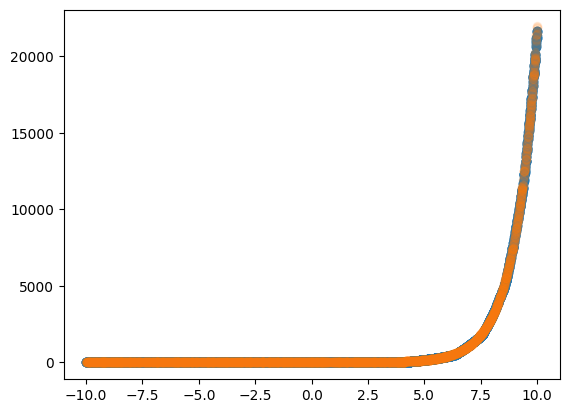

In [77]:
plt.scatter(y = preds,x = TaylorSeries.xs, alpha = 1)
plt.scatter(y = np.exp(TaylorSeries.xs), x = TaylorSeries.xs, alpha =0.1)
plt.show()


In [84]:

np.sum((preds- y)**2)/preds.shape[1]

array([1286.67497652])

## With PyTorch

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim

In [25]:
class FCN(nn.Module):
    def __init__(self):
        super(FCN, self).__init__()
        self.fc1 = nn.Linear(5, 5) 
        self.fc2 = nn.Linear(5, 5) 
        self.fc3 = nn.Linear(5, 1)
        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x) 
        return x

model = FCN()

tensor([[-0.0297]], grad_fn=<AddmmBackward0>)


In [53]:
inputs = torch.from_numpy(xs).float()
targets = torch.from_numpy(np.cos(TaylorSeries.xs)).float()

In [54]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 100

for epoch in range(num_epochs):
    total_loss = 0
    for i in range(inputs.size(0)):
        # Forward pass: Compute predicted y by passing x to the model
        outputs = model(inputs[i].unsqueeze(0))  # Ensure input tensor is correctly shaped

        # Compute and print loss
        loss = criterion(outputs, targets[i].unsqueeze(0)) 
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Print statistics
    average_loss = total_loss / inputs.size(0)
    print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {average_loss:.4f}')



# Final model output check on the last input
final_pred = model(inputs)
print("Example of final prediction:", final_pred)

/Users/joshuachen/anaconda3/envs/uni/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/100], Average Loss: 7171036.1302
Epoch [2/100], Average Loss: 5629904.0242
Epoch [3/100], Average Loss: 4032761.4296
Epoch [4/100], Average Loss: 2833854.9750
Epoch [5/100], Average Loss: 1948713.5389
Epoch [6/100], Average Loss: 1314624.0426
Epoch [7/100], Average Loss: 885024.0128
Epoch [8/100], Average Loss: 606660.9998
Epoch [9/100], Average Loss: 429080.1879
Epoch [10/100], Average Loss: 315090.4180
Epoch [11/100], Average Loss: 238369.3674
Epoch [12/100], Average Loss: 183020.1493
Epoch [13/100], Average Loss: 138973.2081
Epoch [14/100], Average Loss: 103262.8829
Epoch [15/100], Average Loss: 74423.6529
Epoch [16/100], Average Loss: 51306.5518
Epoch [17/100], Average Loss: 34258.6650
Epoch [18/100], Average Loss: 22089.7262
Epoch [19/100], Average Loss: 13745.9820
Epoch [20/100], Average Loss: 7983.8704
Epoch [21/100], Average Loss: 4686.9328
Epoch [22/100], Average Loss: 2846.6986
Epoch [23/100], Average Loss: 1814.5627
Epoch [24/100], Average Loss: 1102.7175
Epoch [25/

In [55]:
final_pred = model(inputs)

In [56]:
xs.shape

(5000, 5)

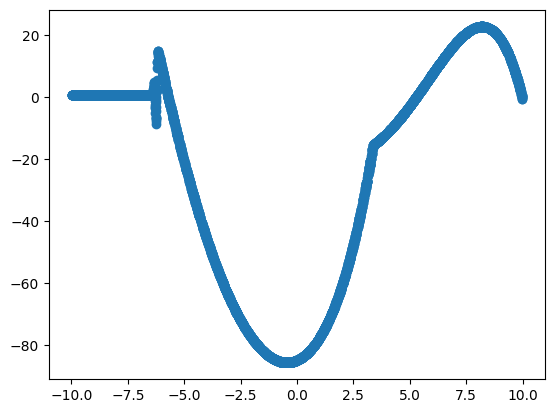

In [57]:
plt.scatter(x = TaylorSeries.xs, y = final_pred.detach().numpy())